Попов Илья Андреевич
ИУ5-23М
Вариант 10

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 
sns.set(style="ticks")

In [2]:
raw_data = pd.read_csv('traffic_violaions.csv', sep=',')

In [3]:
raw_data_with_na = [c for c in raw_data.columns if raw_data[c].isnull().sum() > 0]
raw_data_with_na

['stop_time',
 'country_name',
 'driver_gender',
 'driver_age_raw',
 'driver_age',
 'driver_race',
 'violation_raw',
 'violation',
 'search_conducted',
 'search_type',
 'stop_outcome',
 'is_arrested',
 'stop_duration',
 'drugs_related_stop']

In [4]:
[(c, raw_data[c].isnull().sum()) for c in raw_data_with_na]

[('stop_time', 1),
 ('country_name', 52966),
 ('driver_gender', 3386),
 ('driver_age_raw', 3378),
 ('driver_age', 3620),
 ('driver_race', 3385),
 ('violation_raw', 3385),
 ('violation', 3385),
 ('search_conducted', 1),
 ('search_type', 50881),
 ('stop_outcome', 3385),
 ('is_arrested', 3385),
 ('stop_duration', 3385),
 ('drugs_related_stop', 1)]

In [5]:
list(zip(raw_data.columns, [i for i in raw_data.dtypes]))

[('stop_date', dtype('O')),
 ('stop_time', dtype('O')),
 ('country_name', dtype('float64')),
 ('driver_gender', dtype('O')),
 ('driver_age_raw', dtype('float64')),
 ('driver_age', dtype('float64')),
 ('driver_race', dtype('O')),
 ('violation_raw', dtype('O')),
 ('violation', dtype('O')),
 ('search_conducted', dtype('O')),
 ('search_type', dtype('O')),
 ('stop_outcome', dtype('O')),
 ('is_arrested', dtype('O')),
 ('stop_duration', dtype('O')),
 ('drugs_related_stop', dtype('O'))]

In [6]:
raw_data.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan], dtype=object)

In [7]:
#Задача №10
imputed_data = raw_data.copy()
imputer = SimpleImputer(strategy='most_frequent', fill_value=None)
stop_duration_mstfreq = imputer.fit_transform(raw_data[['stop_duration']].values)
imputed_data['stop_duration'] = stop_duration_mstfreq

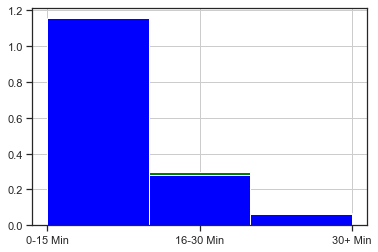

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
raw_data.stop_duration.hist(bins=3, ax=ax, density=True,  color='green')
imputed_data.stop_duration.hist(bins=3, ax=ax, color='blue', density=True)
plt.show()

In [9]:
#Задача №20
raw_data.describe()

,country_name,driver_age_raw,driver_age
count,0.0,49588.000000,49346.000000
mean,NaN,1965.712229,34.171483
std,NaN,132.195712,12.769907
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1977.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


In [10]:
scaled_data = raw_data.copy()
prescaled_drvage = raw_data.driver_age.values.reshape(-1, 1)
scaled_drvage = MinMaxScaler().fit_transform(prescaled_drvage)
scaled_data['driver_age'] = scaled_drvage
scaled_data.describe()

,country_name,driver_age_raw,driver_age
count,0.0,49588.000000,49346.000000
mean,NaN,1965.712229,0.262623
std,NaN,132.195712,0.174930
min,NaN,0.000000,0.000000
25%,NaN,1965.000000,0.109589
50%,NaN,1977.000000,0.219178
75%,NaN,1985.000000,0.383562
max,NaN,8801.000000,1.000000


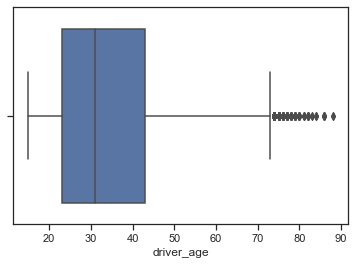

In [11]:
#Доп задание построить график "Ящик с усами (boxplot)"

sns.boxplot(x=raw_data.driver_age) 
plt.show()